## Motivation

The below notebook is intended to be educational for those looking to learn the basics of SQL. It involves using SQL to perform data analysis on using a database containing information about the Indian Premier League (IPL).   
  
In the process, we will review how to interpret database schemas, explore the data using functions, operators and subqueries, utilize joins, and perform basic analytics.

If you want more SQL walkthroughs, check out another walkthrough using sports data here:
https://www.kaggle.com/michaelschmidek/sql-data-analysis-nba

## Process
**Our analysis will adhere to the following 3 steps:**     

1. Gain a high level understanding of the data at hand by:  
a. Reviewing how to interpret database schemas.  
b. Interpreting the database schema of the IPL dataset we will use for this analysis.   

2. Using SQL Functions and operators to look at the tables within our database. 

3. Perform simple analytics on our data

In [1]:
#Import packages

import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

path = "../input/ipldatabase/" #Everything preceding the file name
database = path + 'database.sqlite' #The path + the file name

/kaggle/input/ipldatabase/database.sqlite


## Overview of Data - Database Schema
Connect to the database and get a list of the tables within it.

In [2]:
# sqlite3.connect() Creates a connection object
# database is the variable we established above
conn = sqlite3.connect(database)

#pd.read_sql() is a retrieve function that retrieves what we put in the parenthesis

#After SELECT, put what you want to see. In this case we put *, which means see everything

#After FROM choose a source
    # sqlite_master is an internal table that is present in all SQLite databases. The content of this table describes the database's schema.
    
#After WHERE specify a condiction
    # condition here is where type = table
    
#End with a ";" and close the quotation marks

# conn is our connection object

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
print(tables.tbl_name.to_list())

['Player', 'Extra_Runs', 'Batsman_Scored', 'Batting_Style', 'Bowling_Style', 'Country', 'Season', 'City', 'Outcome', 'Win_By', 'Wicket_Taken', 'Venue', 'Extra_Type', 'Out_Type', 'Toss_Decision', 'Umpire', 'Team', 'Ball_by_Ball', 'sysdiagrams', 'sqlite_sequence', 'Match', 'Rolee', 'Player_Match']


### Analyze our Database Schema  

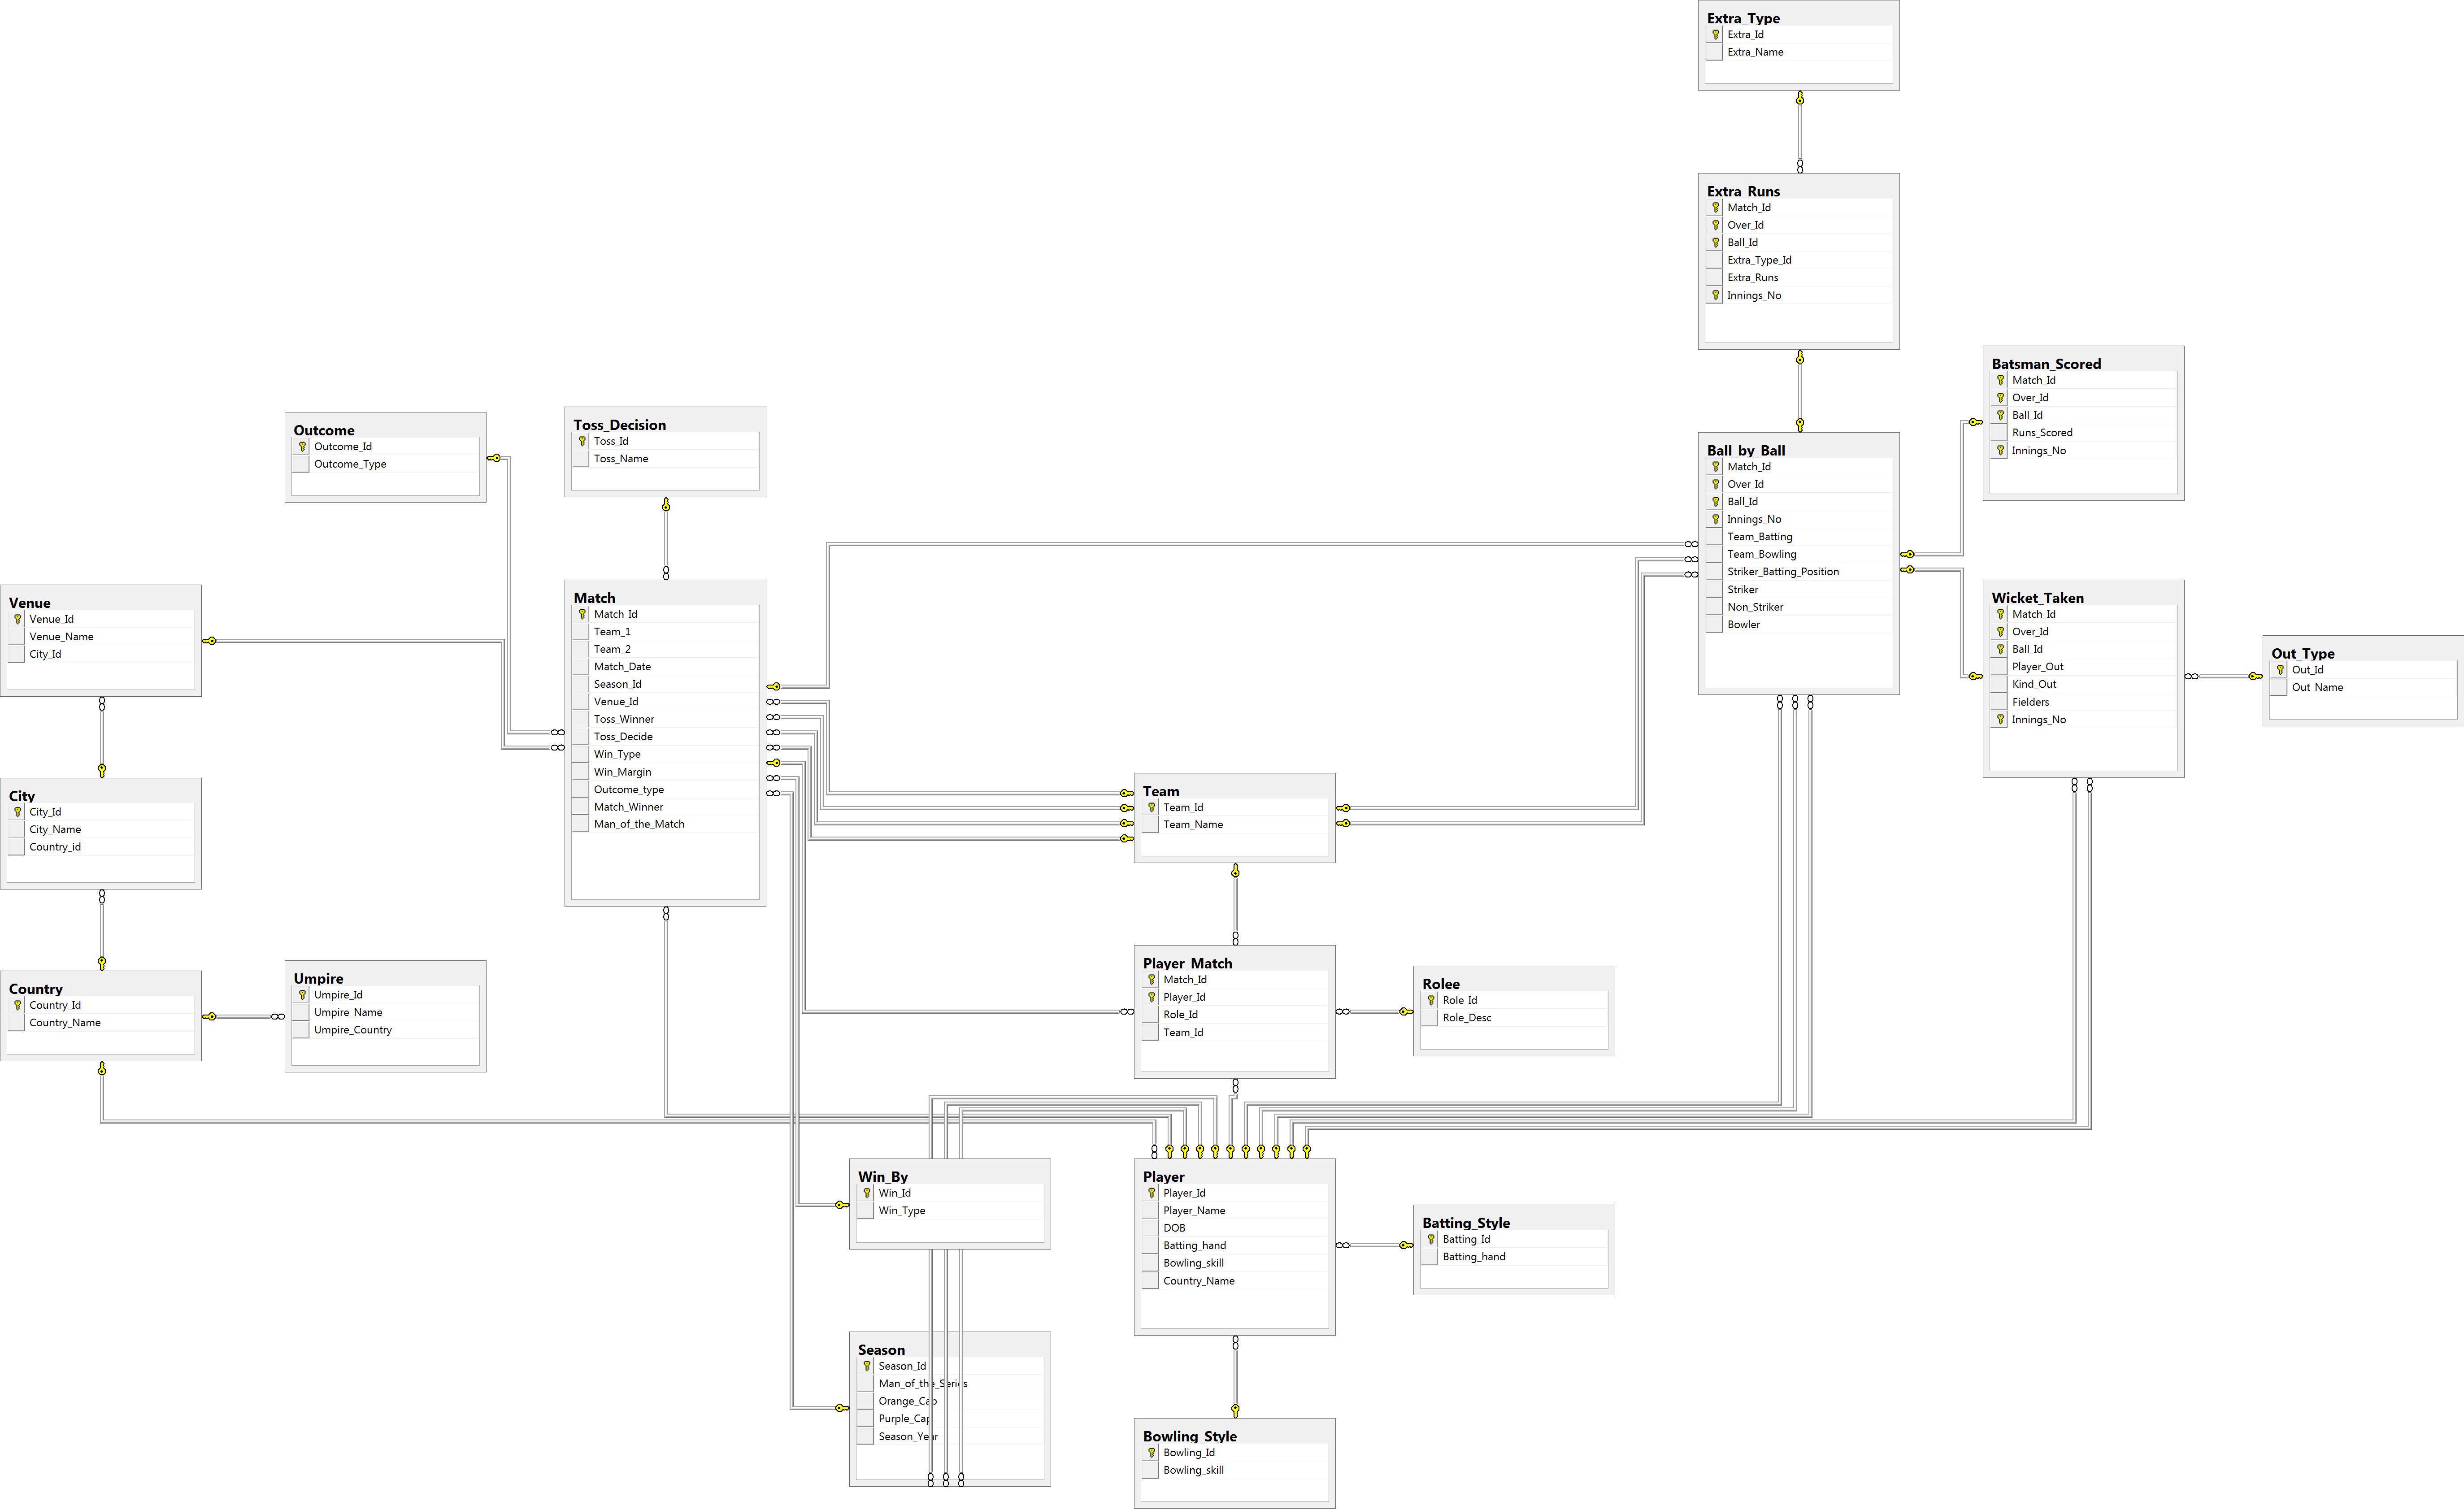

### What is a Database Schema?
A database schema represents the storage of data in a database.   
It describes the organization of the data and the relationships between tables in a given database.  
Developers plan a database schema in advance so they know what components are necessary and how they connect to one another.  
**Further reading:** https://www.educative.io/blog/what-are-database-schemas-examples

### How do we interpret a Database Schema?

**In order to interpret a database schema, it is necessary to understand the following concepts:**

1. Primary keys  
2. Foreign keys  

**Definition of Primary keys**  
The primary key uniquely identifies each record in a table. Primary keys contain a unique value.

**Definition of Foreign keys**  
A forign key refers to the primary key in another table. Foreign keys do not have to contain a unique value

**Let's look at an example**  

In the below example, we have two tables: the "Persons" table and the "Orders" table

Reference: https://www.w3schools.com/sql/sql_foreignkey.asp

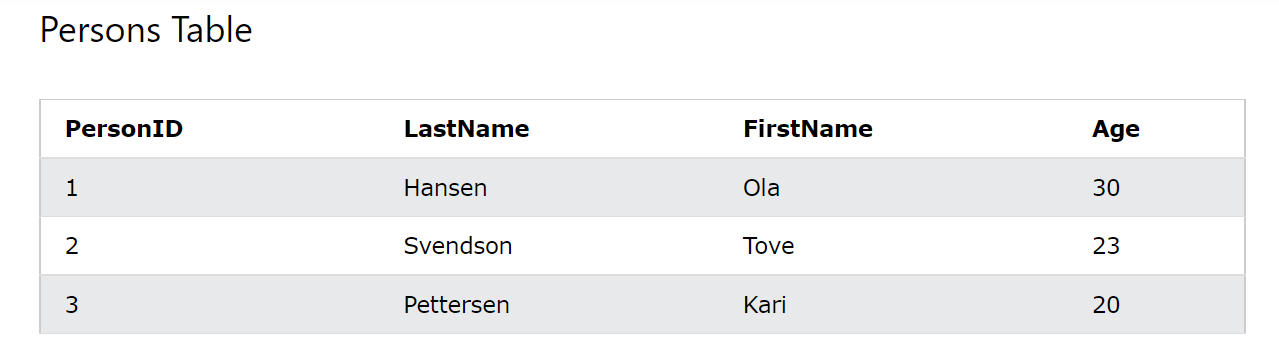
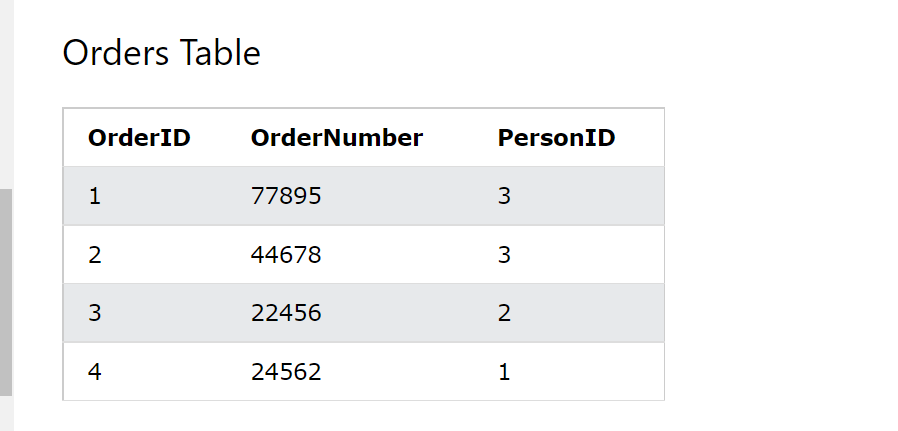

**The "PersonID" column in the "Persons" table is the PRIMARY KEY in the "Persons" table.**

      1. This is because each value in the "PersonID" column uniquely identifies the person. There may be multiple people with the same first/last name, or people who are the same age. However, each person will always have a unique "PersonID"    
      

**The "PersonID" column in the "Orders" table is a FOREIGN KEY in the "Orders" table.**
  
      1. This is because the "PersonID" column in the "Orders" table points to the "PersonID" table. Note that "PersonID" is not populated with unique values in the "Orders" table. This is because each person can have multiple orders. So this is a one to many relationship.
      2. The "Foreign Key Constraint" is a constraint that prevents you from inserting a value into the "PersonID" column of the "Orders" table that is not included in the "Persons" table. So if you tried to insety an order with PersonID "25", you would being inserting invalid data and it would be prevented.


**Now, let's apply these concepts to the our database schema**

#### Example 1: Venue Table/City Table relationship
**Let's zoom in on the database schema and specifically analyze the relationship between the Venue table and the City table**    
  In this example:  
1. The primary key of "Venue" table is "Venue_Id". 
2. The primary key of "City" table is "City_Id".
3. "City_Id" is the foreign key for the "Venue" table. It refers back to the "City_Id" column in "City" table  
4. The two tables have a "one to many" relationship. Each City ID is only included once in the City table. But each city ID can be used multiple times in the venue table, as there may be multiple venues from the same city


**Screenshot of the two tables, their primary keys, and their "One to Many" relationship**

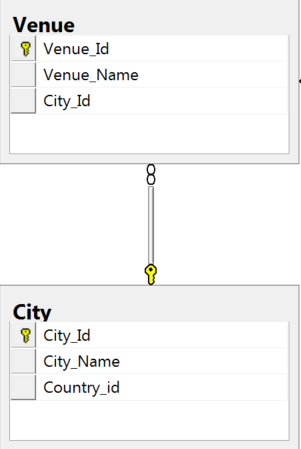

**Screenshot of the City table and venue table**   
A few items of note:  
1. There are 29 rows in the City Table and 29 City IDs. This is because City ID is the primary key of the City table and must be unique.

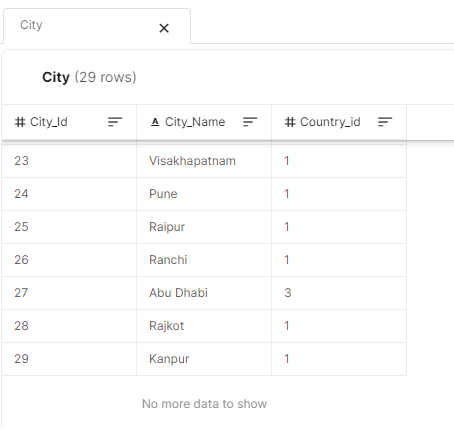

**Screenshot of the Venue table**   
A few items of note:  
1. There are 35 rows in the table and 35 Venue IDs. This is because Venue ID is the primary key, and each value in the column is therefore unique.   
2. City_Id is the foreign key. It refers back to the City_Id column of the City table. As the foreign key, it can have duplicate entries, as shown by the fact that rows 30 and 31 are both attributed to City 27.

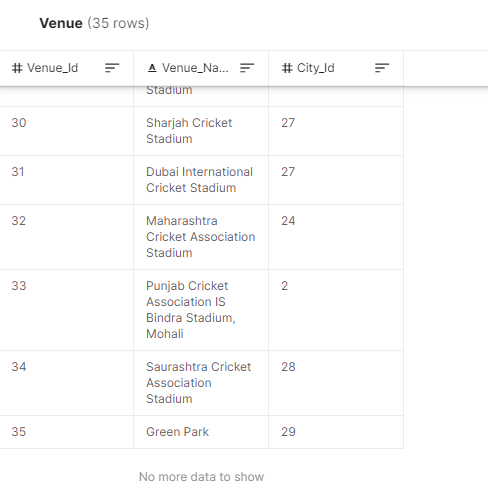

#### Example 2: Umpire Table/Country Table Relationship  
**Let's zoom in on the database schema and specifically analyze the relationship between the Umpire table and the Country table**  
In this example:  
1. "Country_Id" is the primary key for the "Country" table  
2. "Umpire_Id" is the primary key for the "Umpire" table  
3. "Umpire_Country" is the foreign key for the "Umpire" table. It refers back to the "Country_Id" column in "Country" table  
4. The two tables have a "one to many" relationship. Each Country ID is only included once in the Country table. But each country ID can be used multiple times in the umpire table, as there may be multiple umpires from the same country

**Screenshot of the two tables, their primary keys, and their "One to Many" relationship**

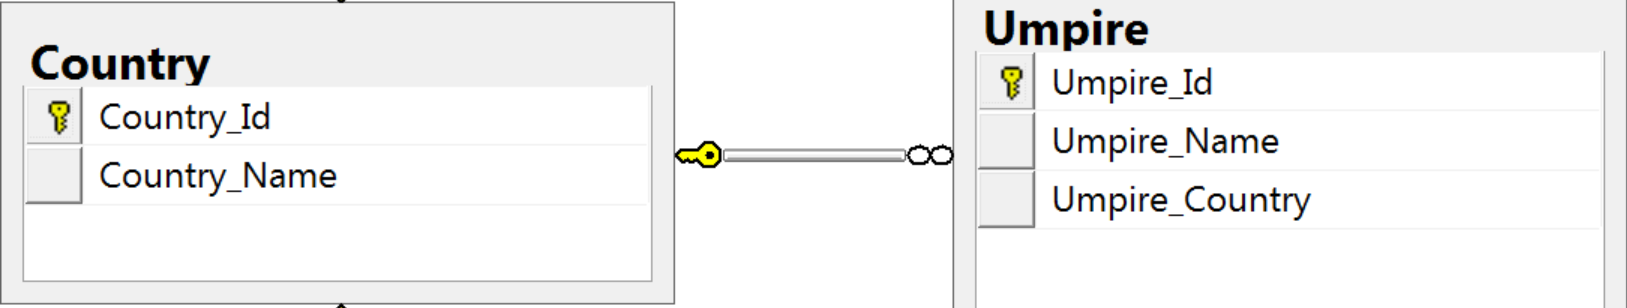

**Screenshot of the Umpire table**   
A few items of note:  
1. There are 52 rows in the table and 52 Umpire IDs. This is because Umpire ID is the primary key, and each value in the column is therefore unique.  
2. There are numerous umpires from Country 1 in the Umpire_Country column. This is because Umpire_Country is the foreign key, and does not need to have unique values.

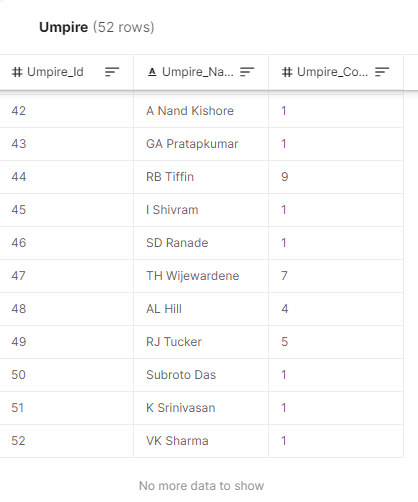

**Screenshot of the Country table**   
A few items of note:  
1. There are 12 rows in the table and 12 Country IDs. This is because Umpire ID is the primary key, and each value in the column is therefore unique.   
2. Umpire_ID from the Umpire table refers back to the Country ID column here.

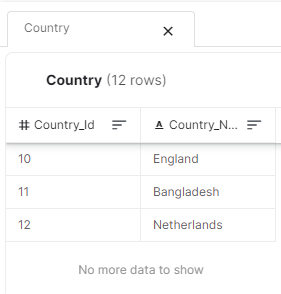

## Look at Tables using functions, operators, and subqueries to plan analysis  

Let's take a look at some of the tables within this database. In the process, we will use the following 18 SQL functions, subqueries, and operators to return data.  
    
1. DISTINCT  
2. MAX   
3. SUM  
4. COUNT  
5. LIKE  
6. AVG  
7. MIN  
8. UCASE  
9. LCASE  
10. SUBSTR
11. LENGTH
12. ROUND   
13. ||  
14. CASE  
15. GROUP BY 1  
16. +, subqueries in FROM clause, subqueries in JOIN operation




**1. DISTINCT**

In [3]:
# Distinct Countries from Umpire table
Umpire_Countries = pd.read_sql("""SELECT distinct(Umpire_Country) 
                    FROM Umpire
                    ORDER BY Umpire_Country ASC;""", conn)

Umpire_Countries

,Umpire_Country
0,1
1,2
2,4
3,5
4,6
5,7
6,8
7,9
8,10


Of the 12 countries in our countries table, all of the Umpires are from 8 of them.

**2. MAX**

In [4]:
# Maximum extra runs scored
Max_Extra_Runs = pd.read_sql("""SELECT 
                    MAX(Extra_Runs)
                    FROM Extra_Runs
                    ;""", conn)

Max_Extra_Runs

,MAX(Extra_Runs)
0,5


5 is the Max Extra runs scored.

**3. SUM**

In [5]:
# Sum extra runs scored in Match 335987
Sum_Extra_Runs = pd.read_sql("""SELECT 
                    Extra_Runs.Match_Id,
                    SUM(Extra_Runs)
                    FROM Extra_Runs
                    WHERE Match_Id = 335987
                    ;""", conn)

Sum_Extra_Runs

,Match_Id,SUM(Extra_Runs)
0,335987,36


36 Extra runs were scored in Match 335987

**4. COUNT**

In [6]:
# Count of Distinct Matches in Extra
Match_Count = pd.read_sql("""SELECT 
                    COUNT(DISTINCT(Match_Id))
                    FROM Extra_Runs
                    ;""", conn)

Match_Count

,COUNT(DISTINCT(Match_Id))
0,577


There are 577 matches in the "Extra_Runs" table (Equal to the 577 unique matches in the "Match" Table.)

**5. LIKE**

In [7]:
# All countries that start with the letter "S"
S_Countries = pd.read_sql("""SELECT * 
                    FROM Country
                    WHERE Country_Name LIKE 'S%'
                    ;""", conn)

S_Countries

,Country_Id,Country_Name
0,2,South Africa
1,7,Sri Lanka


There are 2 countries that start with the letter S.

**6. AVG**

In [8]:
# Average Extra Runs scored
Avg_Extra_Runs = pd.read_sql("""SELECT 
                    Extra_Runs.Match_Id,
                    AVG(Extra_Runs)
                    FROM Extra_Runs
                    GROUP BY Match_Id
                    ;""", conn)

Avg_Extra_Runs

,Match_Id,AVG(Extra_Runs)
0,335987,1.500000
1,335988,1.062500
2,335989,1.416667
3,335990,1.230769
4,335991,1.583333
...,...,...
572,981016,2.000000
573,981018,1.588235
574,981020,1.363636
575,981022,1.000000


**7. MIN**

In [9]:
# Minimum extra runs scored
Min_Extra_Runs = pd.read_sql("""SELECT 
                    MIN(Extra_Runs)
                    FROM Extra_Runs
                    ;""", conn)

Min_Extra_Runs

,MIN(Extra_Runs)
0,1


**8. UCASE**

In [10]:
# Uppercase Countries
Uppercase_Countries = pd.read_sql("""SELECT 
                    UPPER(Country.Country_Name)
                    FROM Country
                    ;""", conn)

Uppercase_Countries

,UPPER(Country.Country_Name)
0,INDIA
1,SOUTH AFRICA
2,U.A.E
3,NEW ZEALAND
4,AUSTRALIA
5,PAKISTAN
6,SRI LANKA
7,WEST INDIES
8,ZIMBABWEA
9,ENGLAND


**9. LCASE**

In [11]:
# Lowercase Countries
Lowercase_Countries = pd.read_sql("""SELECT 
                    LOWER(Country.Country_Name)
                    FROM Country
                    ;""", conn)

Lowercase_Countries

,LOWER(Country.Country_Name)
0,india
1,south africa
2,u.a.e
3,new zealand
4,australia
5,pakistan
6,sri lanka
7,west indies
8,zimbabwea
9,england


**10. SUBSTR**

In [12]:
# First 5 Letters of Countries, concatenated with a "..." if the names are longer than 5
Substr_Countries = pd.read_sql("""SELECT 
                                    CASE
                                        WHEN LENGTH(Country.Country_Name) > 5 THEN
                                            SUBSTR(Country.Country_Name, 1,5) ||"..."
                                        ELSE 
                                            Country.Country_Name
                                        END ShortName
                                    FROM Country
                                    ;""", conn)

Substr_Countries

,ShortName
0,India
1,South...
2,U.A.E
3,New Z...
4,Austr...
5,Pakis...
6,Sri L...
7,West ...
8,Zimba...
9,Engla...


**11. LENGTH**

In [13]:
# Length of Country names
Length_Countries = pd.read_sql("""SELECT 
                    AVG(LENGTH(Country.Country_Name))
                    FROM Country
                    ;""", conn)

Length_Countries

,AVG(LENGTH(Country.Country_Name))
0,8.916667


Average length is 8.92 letters per name.

**12. ROUND**

In [14]:
# Rounded Average Extra Runs scored in Matches starting with 3
Rounded_Avg_Extra_Runs = pd.read_sql("""SELECT 
                    Extra_Runs.Match_Id,
                    ROUND(AVG(Extra_Runs),2) AS Rounded_Avg_Extra_Runs
                    FROM Extra_Runs
                    WHERE Match_Id LIKE "3%"
                    GROUP BY Match_Id
                    LIMIT 10
                    ;""", conn)

Rounded_Avg_Extra_Runs

,Match_Id,Rounded_Avg_Extra_Runs
0,335987,1.50
1,335988,1.06
2,335989,1.42
3,335990,1.23
4,335991,1.58
5,335992,1.00
6,335993,1.55
7,335994,1.48
8,335995,1.08
9,335996,1.08


**13. ||**

In [15]:
# Umpire Name concatenated with Umpire Country for all Umpires with the letter "A" in their name.
Ump_Country_Concatenated = pd.read_sql("""SELECT 
                                    Umpire.Umpire_Name ||" "|| Umpire.Umpire_Country AS A_Umpires_Country
                                    FROM Umpire
                                    WHERE Umpire.Umpire_Name LIKE "%A" OR Umpire.Umpire_Name LIKE "A%"
                                    ;""", conn)

Ump_Country_Concatenated

,A_Umpires_Country
0,Asad Rauf 6
1,Aleem Dar 6
2,AV Jayaprakash 1
3,HDPK Dharmasena 7
4,AM Saheba 1
5,AK Chaudhary 1
6,AY Dandekar 1
7,A Nand Kishore 1
8,AL Hill 4
9,VK Sharma 1


**14. CASE**

In [16]:
From_India_Umpires = pd.read_sql("""SELECT 
                                Umpire.Umpire_Id,
                                Umpire.Umpire_Name,
                                    CASE 
                                        WHEN (Umpire.Umpire_Country) > 1
                                            THEN 'Not From India'
                                        ELSE 
                                            'From India'
                                        END Nationality
                                    FROM Umpire
                                    LIMIT 10
                                    ;""", conn)

From_India_Umpires

,Umpire_Id,Umpire_Name,Nationality
0,1,Asad Rauf,Not From India
1,2,MR Benson,Not From India
2,3,Aleem Dar,Not From India
3,4,SJ Davis,Not From India
4,5,BF Bowden,Not From India
5,6,IL Howell,Not From India
6,7,DJ Harper,Not From India
7,8,RE Koertzen,Not From India
8,9,BR Doctrove,Not From India
9,10,AV Jayaprakash,From India


**15. GROUP BY 1**    
**Note:** It is suggested to be careful when implementing this, as it can cause problems if someone modifies the select statement.  
"Group by 1" means to group by the first column regardless of what it is called.

In [17]:
Team_Toss_Wins = pd.read_sql("""SELECT 
                                    Match.Team_1 AS Team_ID,
                                    COUNT(Toss_Winner) as Toss_Wins,
                                    Team.Team_Name
                                FROM Match
                                LEFT JOIN Team ON Match.Team_1 = Team.Team_Id
                                GROUP BY 1
                                       ;""", conn)
Team_Toss_Wins

,Team_ID,Toss_Wins,Team_Name
0,1,62,Kolkata Knight Riders
1,2,78,Royal Challengers Bangalore
2,3,74,Chennai Super Kings
3,4,65,Kings XI Punjab
4,5,52,Rajasthan Royals
5,6,69,Delhi Daredevils
6,7,62,Mumbai Indians
7,8,39,Deccan Chargers
8,9,7,Kochi Tuskers Kerala
9,10,23,Pune Warriors


## Analyze our Data  
Now, let's use the tools we studied above to answer some questions about our data.

**Question 1: Display how many games each team won and their average win margin, ranked in descending order by team.** 

In [18]:
Victory_Margin = pd.read_sql("""SELECT 
                                    Team.Team_Name,
                                    Match_Winner AS Team_ID,
                                    AVG(Win_Margin) AS Avg_Win_Margin,
                                    Count(Match_Winner) AS Win_Count
                                FROM 
                                    Match
                                JOIN Team
                                    On Match.Match_Winner = Team.Team_Id
                                GROUP BY Match_Winner
                                ORDER BY Avg_Win_Margin DESC
                                            ;""", conn)

Victory_Margin

,Team_Name,Team_ID,Avg_Win_Margin,Win_Count
0,Chennai Super Kings,3,22.721519,79
1,Royal Challengers Bangalore,2,20.681159,70
2,Mumbai Indians,7,19.937500,80
3,Rajasthan Royals,5,17.278689,63
4,Deccan Chargers,8,17.000000,29
5,Kings XI Punjab,4,16.377049,63
6,Kolkata Knight Riders,1,15.294118,68
7,Rising Pune Supergiants,12,14.600000,5
8,Pune Warriors,10,14.583333,12
9,Sunrisers Hyderabad,11,13.333333,34


**Question 2: How many "Man of the Match" awards have been won by Australians vs. Non-Australians?** 

In [19]:
MoM_Count = pd.read_sql("""SELECT 
                                CASE 
                                    WHEN (Player.Country_Name) = 5
                                        THEN 'Australian'
                                    ELSE 
                                        'Not Australian'
                                    END AS Nationality,
                                SUM(CASE
                                    WHEN (Batting_hand) = 1
                                        THEN 1
                                    ELSE
                                        0
                                    END) AS Left_Handed_Count,
                                    Count(Match.Man_of_the_Match) AS MoM_Count
                                FROM 
                                    Match
                                JOIN Player
                                    On Match.Man_of_the_Match = Player.Player_Id
                                GROUP BY Nationality
                                    ;""", conn)

MoM_Count

,Nationality,Left_Handed_Count,MoM_Count
0,Australian,52,110
1,Not Australian,128,464


**Question 3: Which 5 teams have played the most total matches (Home+Away)?** 

In [20]:
Total_Wins = pd.read_sql("""SELECT 
                                            Team.Team_Id AS Team_ID,
                                            Team.Team_Name, 
                                            (Home_Matches+Away_Matches) as Total_Matches
                                        FROM (SELECT DISTINCT Team_1, COUNT(*) AS Home_Matches FROM Match GROUP BY Team_1) AS a
                                        LEFT JOIN (SELECT DISTINCT Team_2, COUNT(*) AS Away_Matches FROM Match GROUP BY Team_2) AS b
                                            ON a.Team_1 = b.Team_2
                                        LEFT JOIN Team
                                            ON a.Team_1 = Team.Team_Id
                                        ORDER BY Total_Matches DESC
                                        LIMIT 5;""", conn)

Total_Wins

,Team_ID,Team_Name,Total_Matches
0,7,Mumbai Indians,140
1,2,Royal Challengers Bangalore,139
2,4,Kings XI Punjab,134
3,6,Delhi Daredevils,133
4,1,Kolkata Knight Riders,132


## Review

**In this notebook, we:**    

1. Gained a high level understanding of the data at hand by:  
a. Reviewing how to interpret database schemas.  
b. Interpreting the database schema of the IPL dataset we will use for this analysis.   

2. Usied SQL Functions and operators to look at the tables within our database. 

3. Performed simple analytics on our data  

**Thank you for taking the time to look at my work!**